In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import yfinance as yf

In [ ]:
df = yf.download('AAPL',period='20y')
df=pd.DataFrame(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-05-02,0.258214,0.260536,0.256071,0.258036,0.219619,321182400
2003-05-05,0.263750,0.301429,0.263393,0.287321,0.244544,1555708000
2003-05-06,0.287857,0.319643,0.287500,0.312500,0.265974,1514492000
2003-05-07,0.309464,0.325714,0.305536,0.315179,0.268255,1054379200
2003-05-08,0.316071,0.322679,0.308750,0.321429,0.273574,687736000


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,36.832776,37.250469,36.428571,36.857181,35.455090,4.148720e+08
std,46.839578,47.419660,46.299546,46.887572,46.866952,3.936886e+08
min,0.258214,0.260536,0.256071,0.258036,0.219619,1.363441e+07
25%,4.670179,4.750000,4.575000,4.675535,3.979434,1.243598e+08
50%,19.177500,19.314644,18.968214,19.141430,16.776699,2.837492e+08
75%,43.321251,43.700001,42.977501,43.276251,41.350868,5.805002e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,3.372970e+09


Text(0, 0.5, 'Closing Price')

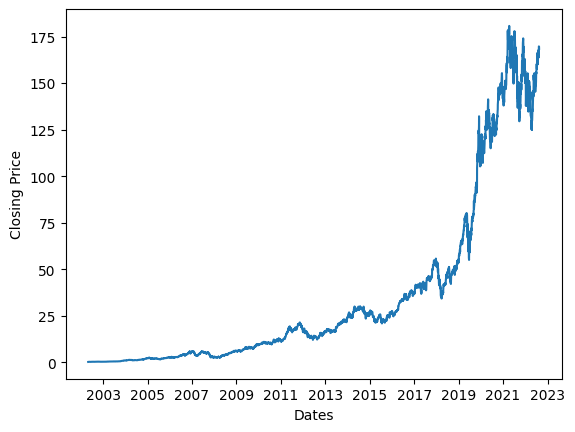

In [ ]:
import matplotlib.dates as mdate
plt.gca().xaxis.set_major_locator(mdate.DayLocator(interval=720))
plt.plot(df.index,df['Adj Close'])
plt.xlabel('Dates')
plt.ylabel('Closing Price')

In [ ]:
# Use today's  'Adj Close' as X and shift it to obtain tomorrow's 'Adj Close' as Y
X = df['Adj Close'].values[:-1].reshape(-1, 1)
Y = df['Adj Close'].values[1:].reshape(-1, 1)

In [ ]:
# Split the data into train and test sets using a rolling window
window_size = 30
num_samples = len(X) - window_size
X_train, Y_train = X[:num_samples], Y[:num_samples]
X_test, Y_test = X[num_samples:], Y[num_samples:]

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
Y_train_scaled = scaler.fit_transform(Y_train)
X_test_scaled = scaler.transform(X_test)
Y_test_scaled = scaler.transform(Y_test)

In [ ]:
# Fit the SVR model with RBF kernel
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train_scaled, Y_train_scaled.ravel())

# Predict on the test set
Y_pred_scaled = svr.predict(X_test_scaled)

Y_pred_scaled = Y_pred_scaled.reshape(-1,1)

# Rescale the predicted values
Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_test = scaler.inverse_transform(Y_test_scaled)

In [ ]:
# Evaluate the model
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, Y_pred))
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(Y_test, Y_pred)))

print("R2_score: %.2f" %r2_score(Y_test, Y_pred))

Mean squared error: 3.90
Coefficient of determination: 0.67
Mean absolute error: 1.51
Root mean squared error: 1.98
R2_score: 0.67


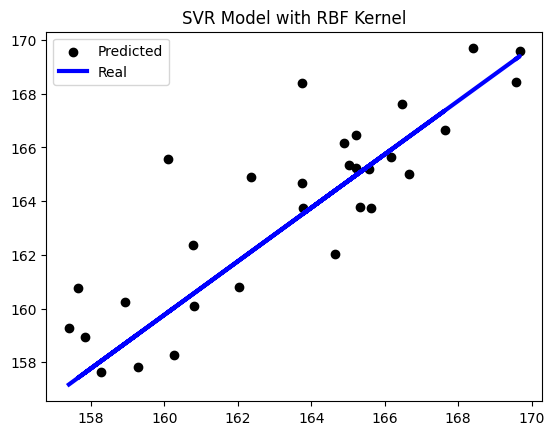

In [ ]:
# Plot the data
plt.scatter(X_test, Y_test, color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.legend(['Predicted', 'Real'])
plt.title('SVR Model with RBF Kernel')
plt.show()